In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = pd.read_csv("C:/Users/vishn/Downloads/IMDB Dataset.csv")

In [ ]:
data['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
def clean_review(review):
    str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [ ]:
print(data.columns)


Index(['review', 'sentiment'], dtype='object')


In [ ]:
data['review'] = data['review'].apply(clean_review)


In [ ]:
#wordcloud

from wordcloud import WordCloud

In [ ]:
print(data['sentiment'].unique())  # see all sentiment labels
print(data[data['sentiment'] == 'neg'].shape)  # how many negative reviews
print(data['review'][data['sentiment'] == 'neg'].head())  # preview a few


['positive' 'negative']
(0, 2)
Series([], Name: review, dtype: object)


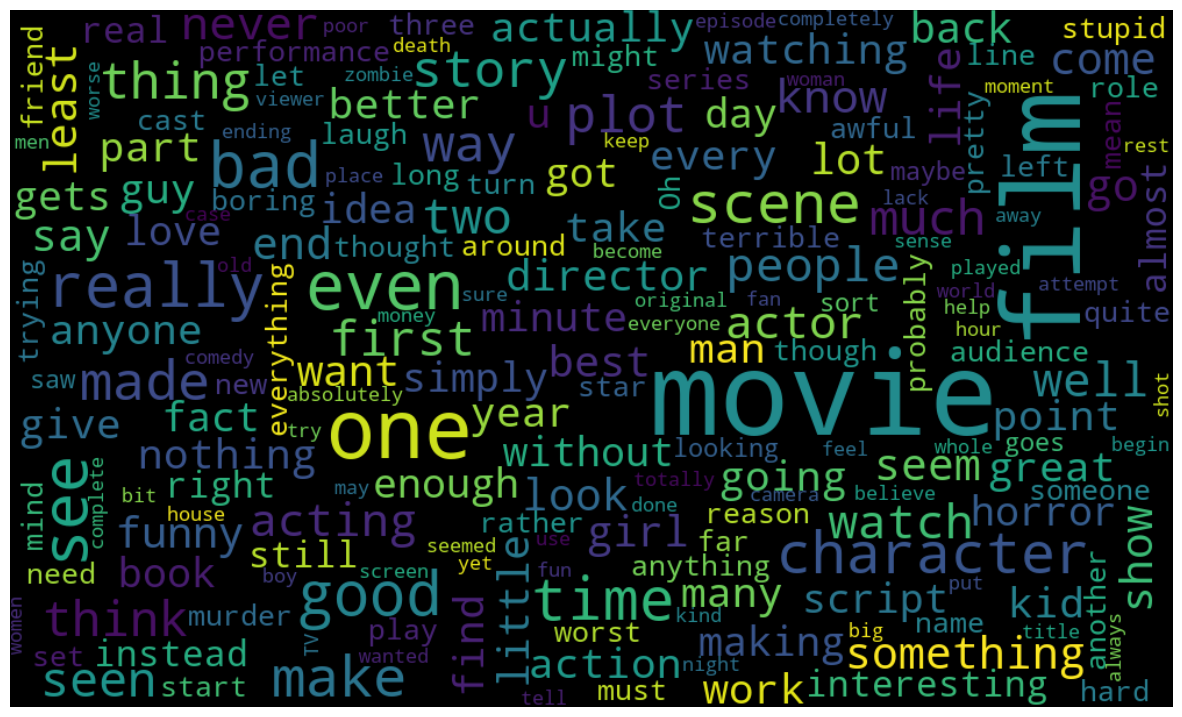

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all negative reviews into one string
review = ' '.join(data['review'][data['sentiment'] == 'negative'].astype(str))
# Create word cloud
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Plot it
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(review), interpolation='bilinear')
plt.axis('off')
plt.show()


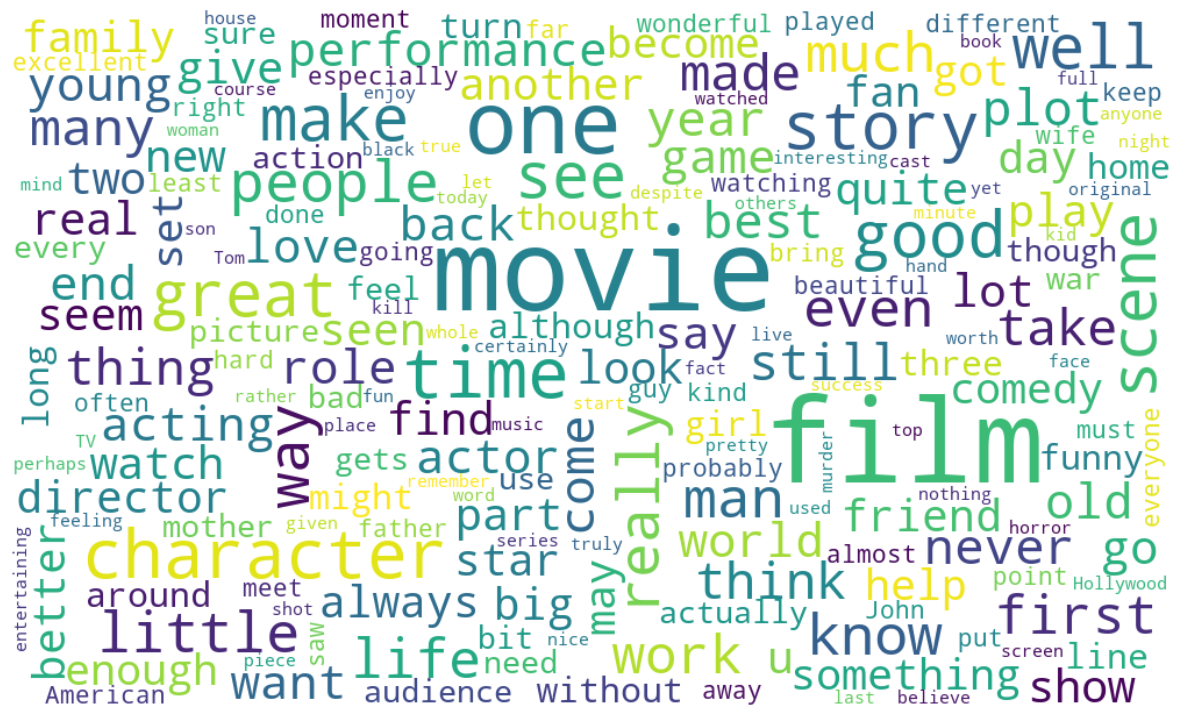

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all positive reviews into one string
review = ' '.join(data['review'][data['sentiment'] == 'positive'].astype(str))

# Create word cloud
wordcloud = WordCloud(height=600, width=1000, max_font_size=100, background_color="white")

# Plot it
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(review), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [ ]:
reviews=cv.fit_transform(data['review']).toarray()

In [ ]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\vishn\AppData\Local\Temp\ipykernel_10928\3724057555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


In [ ]:
data['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reviews, 
    data['sentiment'], 
    test_size=0.2, 
    random_state=42
)

In [ ]:
# Define model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.79


In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Check predictions
print(y_pred[:20])  # first 20 predictions


[0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0]


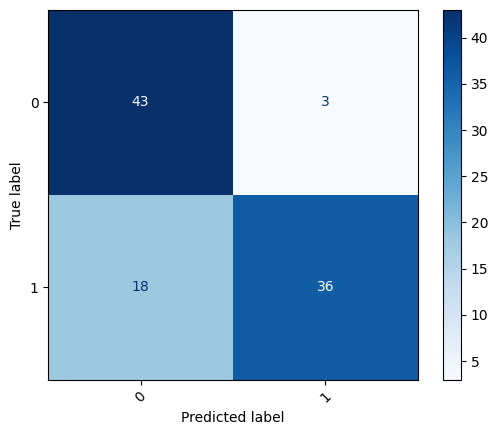

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = pd.read_csv("C:/Users/vishn/Downloads/IMDB Dataset.csv")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)

# TF-IDF
cv = TfidfVectorizer(max_features=2500)
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
import pickle as pk

In [ ]:
pk.dump(model,open('model.pk1','wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle as pk

# Example: create and fit scaler
cv = StandardScaler()
# Suppose you have some data X to fit
# cv.fit(X)  

# Save the scaler
with open('scaler.pk1', 'wb') as f:
    pk.dump(cv, f)


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pickle as pk

# Load dataset
data = pd.read_csv("C:/Users/vishn/OneDrive/Desktop/movie_review/IMDB Dataset.csv")  # change filename as needed

# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

# Apply cleaning to reviews
data['review'] = data['review'].apply(clean_text)

# Encode sentiment if needed (assuming 'positive'/'negative')
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])

# Features and labels
X = data['review']
y = data['sentiment']

# Vectorize text
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model and vectorizer
pk.dump(model, open('model.pk1', 'wb'))
pk.dump(vectorizer, open('scaler.pk1', 'wb'))


C:\Users\vishn\AppData\Local\Temp\ipykernel_24244\1585329489.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


Accuracy: 0.47


In [ ]:
print(data['sentiment'].value_counts())  # Before replace
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])
print(data['sentiment'].value_counts())  # After replace


sentiment
0    263
1    237
Name: count, dtype: int64
sentiment
0    263
1    237
Name: count, dtype: int64


In [ ]:
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [0, 1])

In [ ]:
print(data['sentiment'].value_counts(normalize=True))


sentiment
0    0.526
1    0.474
Name: proportion, dtype: float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())
scores = cross_val_score(pipe, data['review'], data['sentiment'], cv=5)
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.5900000000000001


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=200)
)

scores = cross_val_score(pipe, data['review'], data['sentiment'], cv=5)
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.752


In [ ]:
pipe.fit(data['review'], data['sentiment'])

import pickle as pk
pk.dump(pipe, open('model_pipeline.pkl', 'wb'))


In [ ]:
import pickle as pk
import streamlit as st

model = pk.load(open('model_pipeline.pkl', 'rb'))

st.title("Movie Review Sentiment Analysis")
review = st.text_input('Enter Movie Review')

if st.button('Predict'):
    pred = model.predict([review])
    if pred[0] == 1:
        st.success("✅ Positive Review")
    else:
        st.error("❌ Negative Review")


2025-08-25 23:11:41.499 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:42.404 
  command:

    streamlit run C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-25 23:11:42.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:42.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:42.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:42.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:42.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 23:11:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk

# Assuming you have your data loaded as `data` with columns 'review' and 'sentiment'
# and data['sentiment'] is 0/1 encoded

pipe = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=200)
)

pipe.fit(data['review'], data['sentiment'])

# Save the pipeline as one object
pk.dump(pipe, open('model_pipeline.pkl', 'wb'))

print("Pipeline saved!")


Pipeline saved!


In [ ]:
import pickle as pk

model = pk.load(open('model_pipeline.pkl', 'rb'))

test_reviews = [
    "I loved the movie, it was fantastic!",
    "The movie was terrible and boring.",
    "An amazing film with a great cast."
]

for review in test_reviews:
    pred = model.predict([review.lower()])
    print(f"Review: {review}")
    print("Prediction:", "Positive" if pred[0] == 1 else "Negative")
    print()


Review: I loved the movie, it was fantastic!
Prediction: Negative

Review: The movie was terrible and boring.
Prediction: Negative

Review: An amazing film with a great cast.
Prediction: Negative



In [ ]:
print("Unique labels:", data['sentiment'].unique())
print("Label counts:\n", data['sentiment'].value_counts())

Unique labels: ['positive' 'negative']
Label counts:
 sentiment
negative    263
positive    237
Name: count, dtype: int64


In [ ]:
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})


C:\Users\vishn\AppData\Local\Temp\ipykernel_13540\186387009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk

pipe = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=200)
)

pipe.fit(data['review'], data['sentiment'])  # Now labels are 0/1 numeric

pk.dump(pipe, open('model_pipeline.pkl', 'wb'))
print("Model trained and saved with numeric labels!")


Model trained and saved with numeric labels!


In [ ]:
model = pk.load(open('model_pipeline.pkl', 'rb'))

test_reviews = [
    "I loved the movie, it was fantastic!",
    "The movie was terrible and boring.",
    "An amazing film with a great cast."
]

for review in test_reviews:
    pred = model.predict([review.lower()])
    print(f"Review: {review}")
    print("Prediction:", "Positive" if pred[0] == 1 else "Negative")
    print()


Review: I loved the movie, it was fantastic!
Prediction: Positive

Review: The movie was terrible and boring.
Prediction: Negative

Review: An amazing film with a great cast.
Prediction: Positive



In [ ]:
!pip install pandas scikit-learn


  Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl (11.3 MB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl (38.6 MB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle as pk

# Example data loading (replace with your actual data)
data = pd.read_csv("C:/Users/vishn/OneDrive/Desktop/movie_review/IMDB Dataset.csv")  # Your dataset with 'review' and 'sentiment' columns

# Make sure sentiment is numerical (e.g., 1=positive, 0=negative)
data['sentiment'] = data['sentiment'].replace({'positive':1, 'negative':0})

# Create pipeline with vectorizer + model
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=200)
)

# Train pipeline
pipeline.fit(data['review'], data['sentiment'])

# Save the entire pipeline
with open('model_pipeline.pkl', 'wb') as f:
    pk.dump(pipeline, f)

print("Model pipeline saved as 'model_pipeline.pkl'")


Model pipeline saved as 'model_pipeline.pkl'


C:\Users\vishn\AppData\Local\Temp\ipykernel_356\444830862.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive':1, 'negative':0})


In [2]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle as pk

# ✅ 1. Load your dataset
data = pd.read_csv("C:/Users/vishn/OneDrive/Desktop/movie_review/IMDB Dataset.csv")  # Replace with your actual file name

# ✅ 2. Convert 'sentiment' to numeric labels
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})

# ✅ 3. Optional: balance the dataset
min_class = data['sentiment'].value_counts().min()
balanced_data = pd.concat([
    data[data['sentiment'] == 1].sample(min_class, random_state=42),
    data[data['sentiment'] == 0].sample(min_class, random_state=42)
])

# ✅ 4. Train pipeline
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=300)
)
pipeline.fit(balanced_data['review'], balanced_data['sentiment'])

# ✅ 5. Save model
with open("model_pipeline.pkl", "wb") as f:
    pk.dump(pipeline, f)

print("✅ Model saved as 'model_pipeline.pkl'")


✅ Model saved as 'model_pipeline.pkl'


C:\Users\vishn\AppData\Local\Temp\ipykernel_19772\4029653113.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})


In [3]:
import pickle

model = pickle.load(open("model_pipeline.pkl", "rb"))

review = "this movie is really good"
prediction = model.predict([review.lower()])
proba = model.predict_proba([review.lower()])

print("Prediction:", "Positive" if prediction[0] == 1 else "Negative")
print("Probabilities [Negative, Positive]:", proba[0])


Prediction: Negative
Probabilities [Negative, Positive]: [0.53594807 0.46405193]


In [4]:
# Show a few examples
print(data.sample(10))

# Check class distribution
print(data['sentiment'].value_counts())


                                                review  sentiment
448  I thrive on cinema....but there is a limit. A ...          0
133  This movie shows a clip of live animal mutilat...          0
323  Even though I saw this film when I was very yo...          1
373  Owen loves his Mamma...only he'd love her bett...          1
35   I bought this film at Blockbuster for $3.00, b...          0
139  I caught this film on AZN on cable. It sounded...          0
245  I have seen this film at least 100 times and I...          1
414  I feel dumber after watching the first 20 min,...          0
330  I did not expect much from this film, but boy-...          0
61   I've just watched Fingersmith, and I'm stunned...          0
sentiment
0    263
1    237
Name: count, dtype: int64


In [9]:
import pandas as pd

short_reviews = pd.DataFrame({
    'review': [
        'really good movie',
        'this was amazing',
        'I liked it',
        'loved the film',
        'great watch',
        'super boring',
        'waste of time',
        'did not like it',
        'terrible acting',
        'really bad movie',
        'not good'
    ],
    'sentiment': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
})


In [6]:
full_data = pd.concat([data, short_reviews], ignore_index=True)


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=200)
)

pipeline.fit(full_data['review'], full_data['sentiment'])

with open("model_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [ ]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Sample input (you can replace this with any user input)
review = "I absolutely loved this movie, it was fantastic and heartwarming"

# Get prediction
result = classifier(review)[0]

# Output
label = result['label']
confidence = result['score']

# Map label for readability
mapped = "Positive" if label == "POSITIVE" else "Negative"

print("Review:", review)
print("Prediction:", mapped)
print("Confidence:", round(confidence * 100, 2), "%")


c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-f